In [6]:
import numpy as np
from matplotlib import pyplot as plt

from collections import defaultdict
import uproot
import re
from glob import glob

In [7]:
filelist = glob("./Python_Analysis/output/final_mc/*.root")
filelist

['./Python_Analysis/output/final_mc/W.root',
 './Python_Analysis/output/final_mc/Diboson.root',
 './Python_Analysis/output/final_mc/TTbkgd.root',
 './Python_Analysis/output/final_mc/TTLLorLTAUL.root',
 './Python_Analysis/output/final_mc/ST.root',
 './Python_Analysis/output/final_mc/DY.root']

In [8]:
data = glob("./Python_Analysis/output/Data.root")
filelist.append(data[0])
filelist

['./Python_Analysis/output/final_mc/W.root',
 './Python_Analysis/output/final_mc/Diboson.root',
 './Python_Analysis/output/final_mc/TTbkgd.root',
 './Python_Analysis/output/final_mc/TTLLorLTAUL.root',
 './Python_Analysis/output/final_mc/ST.root',
 './Python_Analysis/output/final_mc/DY.root',
 './Python_Analysis/output/Data.root']

In [11]:
files = {}
for file in filelist:
    #name = re.findall(r".*_([A-z]*)\.root", file)[0]
    name = file.split("/")[-1].split('.')[0]
    files[name] = uproot.open(file)


In [12]:
files

{'W': <ReadOnlyDirectory '/' at 0x7f23e8ddb100>,
 'Diboson': <ReadOnlyDirectory '/' at 0x7f23e8ddb4f0>,
 'TTbkgd': <ReadOnlyDirectory '/' at 0x7f24503495d0>,
 'TTLLorLTAUL': <ReadOnlyDirectory '/' at 0x7f23e8e307f0>,
 'ST': <ReadOnlyDirectory '/' at 0x7f23e8e31210>,
 'DY': <ReadOnlyDirectory '/' at 0x7f23e8e31cf0>,
 'Data': <ReadOnlyDirectory '/' at 0x7f23e8e327d0>}

In [19]:
branches = [
    "Muon_pt",
    "Muon_eta",
    "Muon_phi",
    "Muon_mass",
    "Electron_pt",
    "Electron_eta",
    "Electron_phi",
    "Electron_mass",
    "Jet_pt",
    "Jet_eta",
    "Jet_phi",
    "Jet_mass",
    "mu_e_inv_mass",
    "leading_lepton_pt",
]


In [20]:
data_hists = list(files['Data'].classnames().keys())
#data_hists.remove('tout;1')
#data_hists.remove('h_Electron_eta;1')
data_hists

['tout;1',
 'h_Muon_pt;1',
 'h_Muon_eta;1',
 'h_Electron_pt;1',
 'h_Electron_eta;1',
 'h_Muon_Electron_invariant_mass;1',
 'h_leading_lepton_pt;1']

In [21]:
mc_hists = [re.findall(r"(.*);1", i)[0]+"_weighted;1" for i in data_hists]
#mc_hists.remove("h_Electron_eta_weighted;1")
mc_hists

['tout_weighted;1',
 'h_Muon_pt_weighted;1',
 'h_Muon_eta_weighted;1',
 'h_Electron_pt_weighted;1',
 'h_Electron_eta_weighted;1',
 'h_Muon_Electron_invariant_mass_weighted;1',
 'h_leading_lepton_pt_weighted;1']

In [45]:
files['Data']['tout']['Electron_pt'].array()

DeserializationError: while reading

    TBasket version None as uproot.models.TBasket.Model_TBasket (? bytes)
        fNbytes: 78
        fObjlen: 0
        fDatime: 1854719872
        fKeylen: 78
        fCycle: 0
        fVersion: 3
        fBufferSize: 32000
        fNevBufSize: 8
        fNevBuf: 0
        fLast: 78
Members for TBasket: fNbytes?, fObjlen?, fDatime?, fKeylen?, fCycle?, fVersion?, fBufferSize?, fNevBufSize?, fNevBuf?, fLast?

attempting to get bytes 375401:375401
outside expected range 375245:375323 for this Chunk
in file ./Python_Analysis/output/Data.root

In [40]:
df = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
for sample in files:
    for branch in branches:
        if sample == 'Data':
            df[branch]['Data'][sample]['array'] = files[sample]['tout'][branch].array()
        else:
            df[branch]['MC'][sample]['array'] = files[sample]['tout'][branch].array()
            df[branch]['MC'][sample]['weights'] = files[sample]['weights']['normalised_weights'].array()


DeserializationError: while reading

    TBasket version None as uproot.models.TBasket.Model_TBasket (? bytes)
        fNbytes: 74
        fObjlen: 0
        fDatime: 1854719872
        fKeylen: 74
        fCycle: 0
        fVersion: 3
        fBufferSize: 32000
        fNevBufSize: 8
        fNevBuf: 0
        fLast: 74
Members for TBasket: fNbytes?, fObjlen?, fDatime?, fKeylen?, fCycle?, fVersion?, fBufferSize?, fNevBufSize?, fNevBuf?, fLast?

attempting to get bytes 375093:375093
outside expected range 374945:375019 for this Chunk
in file ./Python_Analysis/output/Data.root

In [23]:
df

defaultdict(<function __main__.<lambda>()>,
            {'Muon_pt': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'MC': defaultdict(list,
                                      {'W': <TBranch 'Muon_pt' at 0x7f23e8e33880>,
                                       'Diboson': <TBranch 'Muon_pt' at 0x7f23e6cc0be0>,
                                       'TTbkgd': <TBranch 'Muon_pt' at 0x7f23e6cfba90>,
                                       'TTLLorLTAUL': <TBranch 'Muon_pt' at 0x7f23e6d3b280>,
                                       'ST': <TBranch 'Muon_pt' at 0x7f23e6d7a5c0>,
                                       'DY': <TBranch 'Muon_pt' at 0x7f23e6baddb0>}),
                          'Data': defaultdict(list,
                                      {'Data': <TBranch 'Muon_pt' at 0x7f23e6bf15a0>})}),
             'Muon_eta': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'MC': defaultdict(list,
                  

In [15]:
df = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
for sample in files:
    for hist in data_hists:
        if sample == 'Data':
            df[hist]['Data'][sample] = files[sample][hist].to_numpy()
        else:
            df[hist]['MC'][sample] = files[sample][hist.replace(";1", "_weighted;1")].to_numpy()


KeyInFileError: not found: 'tout_weighted' with cycle 1

    Available keys: 'weights;1', 'tout;1', 'h_Muon_pt_weighted;1', 'h_Muon_eta_weighted;1', 'h_Electron_pt_weighted;1', 'h_Electron_eta_weighted;1', 'Run_out;1', 'h_Muon_eta;1', 'h_Muon_pt;1', 'h_leading_lepton_pt_weighted;1'...

in file ./Python_Analysis/output/final_mc/W.root

In [22]:
files['Wj'].classnames()

{'tout;1': 'TTree',
 'h_Muon_pt_weighted;1': 'TH1D',
 'h_Muon_eta_weighted;1': 'TH1D',
 'h_Electron_pt_weighted;1': 'TH1D',
 'h_Muon_Electron_invariant_mass_weighted;1': 'TH1D',
 'h_leading_lepton_pt_weighted;1': 'TH1D',
 'h_Muon_pt;1': 'TH1D',
 'h_Muon_eta;1': 'TH1D',
 'h_Electron_pt;1': 'TH1D',
 'h_Electron_eta;1': 'TH1D',
 'h_Muon_Electron_invariant_mass;1': 'TH1D',
 'h_leading_lepton_pt;1': 'TH1D'}

In [38]:
def stacked_histo(n_data, n_mc: dict, title=None, xlabel=r"$p_{\mathrm{T}}$ [GeV]", savepath=None) -> None:
    fig, axs = plt.subplots(2,1, gridspec_kw={'height_ratios':[3,1]})
    if title:
        fig.suptitle(f"{title}")
    bottom = np.zeros(shape=n_data[0].shape)
    # sort n_mc by max
    n_mc_sorted = {key: value for key, value in sorted(n_mc.items(), key=lambda x: x[1][0].max())}
    for sample in n_mc_sorted:
        centers = (n_mc[sample][1][1:]+n_mc[sample][1][:-1])/2.
        width = centers[1]-centers[0]
        axs[0].bar(centers,n_mc[sample][0], width=width,bottom=bottom, align='center', label=sample)
        bottom+=n_mc[sample][0]
    centers_data = (n_data[1][1:]+n_data[1][:-1])/2.
    axs[0].errorbar(centers_data, n_data[0], yerr=np.sqrt(n_data[0]), fmt='.',label='data')
    axs[0].legend()
    axs[0].set_ylabel("N")
    xmin, xmax = axs[0].get_xbound()
    summed_mc = np.zeros(shape=n_mc[sample][0].shape) 
    for sample in n_mc:
        summed_mc+= n_mc[sample][0]
    ratio = n_data[0]/summed_mc
    data_err, mc_err = np.sqrt(n_data[0]), np.sqrt(summed_mc)
    ratio_err = np.sqrt((data_err/summed_mc)**2+(n_data[0]*mc_err/(summed_mc**2))**2)
    axs[1].errorbar(centers_data, ratio, yerr=ratio_err, fmt='.', label = 'ratio')
    axs[1].set_xbound(xmin,xmax)
    axs[1].axhline(1, color='k', linestyle='--')
    axs[1].set_xlabel(f"{xlabel}")
    axs[1].set_ylabel(f"Ratio")
    delta = np.abs(ratio-1)
    axs[1].set_ylim([1-(np.nanmax(delta)+0.1),1+(np.nanmax(delta)+0.1)])
    #axs[1].set_ybound([0.5,1.5])
    if savepath:
        plt.tight_layout()
        plt.savefig(f"{savepath}")
    plt.show()

/tmp/ipykernel_44268/3404996798.py:21: RuntimeWarning: invalid value encountered in divide
  ratio = n_data[0]/summed_mc
/tmp/ipykernel_44268/3404996798.py:23: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.sqrt((data_err/summed_mc)**2+(n_data[0]*mc_err/(summed_mc**2))**2)


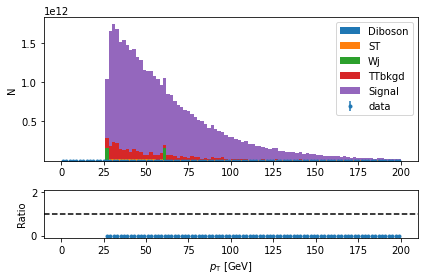

/tmp/ipykernel_44268/3404996798.py:21: RuntimeWarning: invalid value encountered in divide
  ratio = n_data[0]/summed_mc
/tmp/ipykernel_44268/3404996798.py:23: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.sqrt((data_err/summed_mc)**2+(n_data[0]*mc_err/(summed_mc**2))**2)


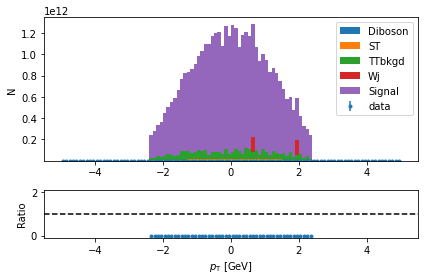

/tmp/ipykernel_44268/3404996798.py:21: RuntimeWarning: invalid value encountered in divide
  ratio = n_data[0]/summed_mc
/tmp/ipykernel_44268/3404996798.py:23: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.sqrt((data_err/summed_mc)**2+(n_data[0]*mc_err/(summed_mc**2))**2)


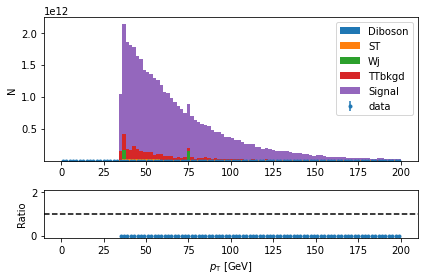

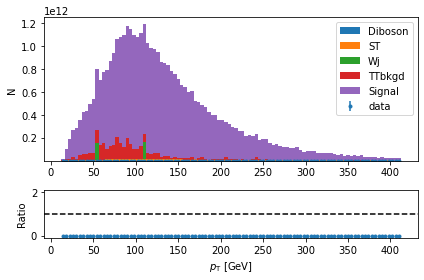

/tmp/ipykernel_44268/3404996798.py:21: RuntimeWarning: invalid value encountered in divide
  ratio = n_data[0]/summed_mc
/tmp/ipykernel_44268/3404996798.py:23: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.sqrt((data_err/summed_mc)**2+(n_data[0]*mc_err/(summed_mc**2))**2)


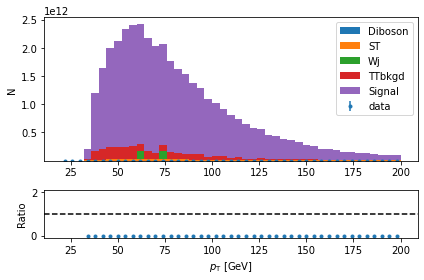

In [39]:
for hist in df:
    n_mc = df[hist]['MC']
    n_data = df[hist]['Data']['Data']
    stacked_histo(n_data, n_mc, savepath=f"./{hist}.pdf")

In [47]:
files['Diboson']['tout'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon_pt              | double                   | AsDtype('>f8')
Muon_eta             | double                   | AsDtype('>f8')
Muon_phi             | double                   | AsDtype('>f8')
Muon_mass            | double                   | AsDtype('>f8')
Electron_pt          | double                   | AsDtype('>f8')
Electron_eta         | double                   | AsDtype('>f8')
Electron_phi         | double                   | AsDtype('>f8')
Electron_mass        | double                   | AsDtype('>f8')
Jet_pt               | double                   | AsDtype('>f8')
Jet_eta              | double                   | AsDtype('>f8')
Jet_phi              | double                   | AsDtype('>f8')
Jet_mass             | double                   | AsDtype('>f8')
mu_e_inv_mass        | double                   | AsDtype(

In [56]:
for i in ['Wj', 'TTbkgd', 'ST', 'Signal']:
    print(np.unique(files[i]['tout']['Sum_w'].array()))

[4.83e+08, 2.57e+09]
[1.44e+07, 1.75e+07, 1.98e+07, 1.99e+07, ... 4.15e+08, 4.16e+08, 4.16e+08, 4.16e+08]
[3.32e+04, 6.67e+04, 9.86e+04, 1.67e+05, ... 3.02e+07, 3.63e+07, 3.93e+07, 4.82e+07]
[2.16e+05, 2.17e+05, 4.31e+05, 6.49e+05, ... 1e+08, 1e+08, 1.01e+08, 1.01e+08]


In [ ]:
files['Signal']['tout']['weight'].array()

<Array [2.78e+08, 3.24e+08, ... 3.19e+08] type='105156 * float64'>